In [21]:
# STEP 1: Import required libraries
import pandas as pd

# STEP 2: Upload files (run this once)
from google.colab import files
uploaded = files.upload()


In [22]:
# STEP 3: Load the CSVs into DataFrames
historical_df = pd.read_csv('historical_data.csv')
sentiment_df = pd.read_csv('fear_greed_index.csv')

# STEP 4: Quick look at the data
print("📌 Historical Trader Data:")
display(historical_df.head())

print("\n📌 Fear & Greed Sentiment Data:")
display(sentiment_df.head())


📌 Historical Trader Data:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12



📌 Fear & Greed Sentiment Data:


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [23]:
# Convert 'Timestamp IST' to datetime
historical_df['Timestamp IST'] = pd.to_datetime(historical_df['Timestamp IST'], errors='coerce')

# Create a new 'date' column for merging (date only, without time)
historical_df['date'] = historical_df['Timestamp IST'].dt.date

# Convert 'date' column in sentiment data to datetime and then to just date
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'], errors='coerce').dt.date

# Keep only the necessary columns from sentiment data
sentiment_df = sentiment_df[['date', 'classification']]

# Preview the cleaned columns
print("📌 Cleaned Historical Data Dates:")
display(historical_df[['Timestamp IST', 'date']].head())

print("\n📌 Cleaned Sentiment Data:")
display(sentiment_df.head())


📌 Cleaned Historical Data Dates:


,Timestamp IST,date
0,2024-02-12 22:50:00,2024-02-12
1,2024-02-12 22:50:00,2024-02-12
2,2024-02-12 22:50:00,2024-02-12
3,2024-02-12 22:50:00,2024-02-12
4,2024-02-12 22:50:00,2024-02-12



📌 Cleaned Sentiment Data:


,date,classification
0,2018-02-01,Fear
1,2018-02-02,Extreme Fear
2,2018-02-03,Fear
3,2018-02-04,Extreme Fear
4,2018-02-05,Extreme Fear


In [24]:
# Merge both datasets on 'date'
merged_df = pd.merge(historical_df, sentiment_df, on='date', how='inner')

# Display merged data
print("📌 Merged Dataset:")
display(merged_df.head())

# Check number of rows before and after merge to see how much data matched
print(f"Original Trades: {len(historical_df)}")
print(f"Merged Trades with Sentiment: {len(merged_df)}")


📌 Merged Dataset:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-02-12 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-02-12,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-02-12 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-02-12,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-02-12 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-02-12,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-02-12 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-02-12,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-02-12 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-02-12,Greed


Original Trades: 211224
Merged Trades with Sentiment: 35864


🔹 Number of trades by sentiment:
classification
Fear             13869
Greed            11292
Extreme Greed     5621
Neutral           2756
Extreme Fear      2326
Name: count, dtype: int64


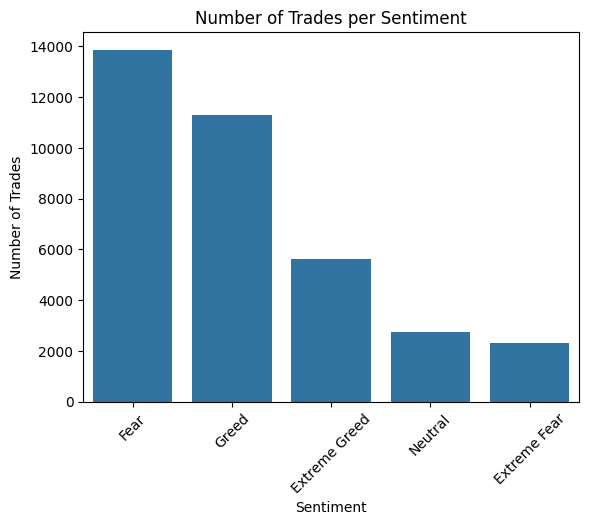

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1️⃣ Number of trades per sentiment
trade_counts = merged_df['classification'].value_counts()
print("🔹 Number of trades by sentiment:")
print(trade_counts)

# Bar plot
sns.countplot(data=merged_df, x='classification', order=trade_counts.index)
plt.title("Number of Trades per Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Number of Trades")
plt.xticks(rotation=45)
plt.show()


In [26]:
# 2️⃣ Average PnL by sentiment
if 'closedPnL' in merged_df.columns:
    avg_pnl = merged_df.groupby('classification')['closedPnL'].mean().sort_values()
    print("\n🔹 Average PnL by sentiment:")
    print(avg_pnl)

    avg_pnl.plot(kind='bar', title='Average PnL by Sentiment', ylabel='PnL', color='green')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("❌ 'closedPnL' column not found.")


❌ 'closedPnL' column not found.


In [27]:
# 3️⃣ Average leverage by sentiment (if available)
if 'leverage' in merged_df.columns:
    avg_leverage = merged_df.groupby('classification')['leverage'].mean().sort_values()
    print("\n🔹 Average Leverage by sentiment:")
    print(avg_leverage)

    avg_leverage.plot(kind='bar', title='Average Leverage by Sentiment', ylabel='Leverage', color='orange')
    plt.xticks(rotation=45)
    plt.show()
